In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from FinancialMachineLearning.features.entropy import *

In [2]:
import os
os.chdir('..')
os.chdir('..')
os.getcwd()

'/Users/tommylee/Desktop/Pycharm/FinancialMachineLearning'

In [3]:
dollar = pd.read_csv('./Data/dollar_IVEfuture.csv', index_col = 0, parse_dates = True)
dollar = dollar[~dollar.index.duplicated(keep = 'first')]
dollar

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2009-09-28 09:46:34,80,50.79,51.070,50.7100,51.07,20044,13264,80,1.020027e+06
2009-09-28 09:52:47,142,51.07,51.148,51.0500,51.13,21024,19774,62,1.073986e+06
2009-09-28 09:54:38,201,51.14,51.150,51.1290,51.13,19951,6951,59,1.020145e+06
2009-09-28 09:55:26,243,51.13,51.150,51.1300,51.14,19652,18052,42,1.004999e+06
2009-09-28 10:02:48,339,51.14,51.260,51.0800,51.25,19943,11354,96,1.020512e+06
...,...,...,...,...,...,...,...,...,...
2023-09-14 15:54:32,10930083,162.98,163.060,162.9654,162.98,6186,3983,39,1.008408e+06
2023-09-14 15:59:20,10930131,162.99,163.040,162.9299,163.04,7158,4629,48,1.166735e+06
2023-09-14 15:59:39,10930171,163.04,163.050,162.9900,163.00,6316,3266,40,1.029639e+06


#### Fractional Difference

In [4]:
from FinancialMachineLearning.features.fracdiff import *
import warnings
warnings.filterwarnings('ignore')

frac_dollar = pd.read_csv('./Data/fracdiff.csv', index_col = 0)

#### Continuous Entropy

Entropy 추정에는 시장의 일부 기억을 유지하고 있는 fracdiff 계열을 사용하는것이 좋다 (Lopez de Prado, 2018)

In [5]:
frac_dollar

,close
2010-04-29 10:26:57,10.476812
2010-04-29 11:09:15,10.507715
2010-04-29 11:26:03,10.464420
2010-04-29 11:34:28,10.488812
2010-04-29 11:44:01,10.540226
...,...
2023-09-14 15:54:32,28.022345
2023-09-14 15:59:20,28.081668
2023-09-14 15:59:39,28.025730
2023-09-14 15:59:59,28.004278


In [6]:
cont_etp = ContinuousEntropy(ret = frac_dollar, period = 100)

In [7]:
cont_etp = cont_etp.continuous_entropy(correlation = False)

<Axes: >

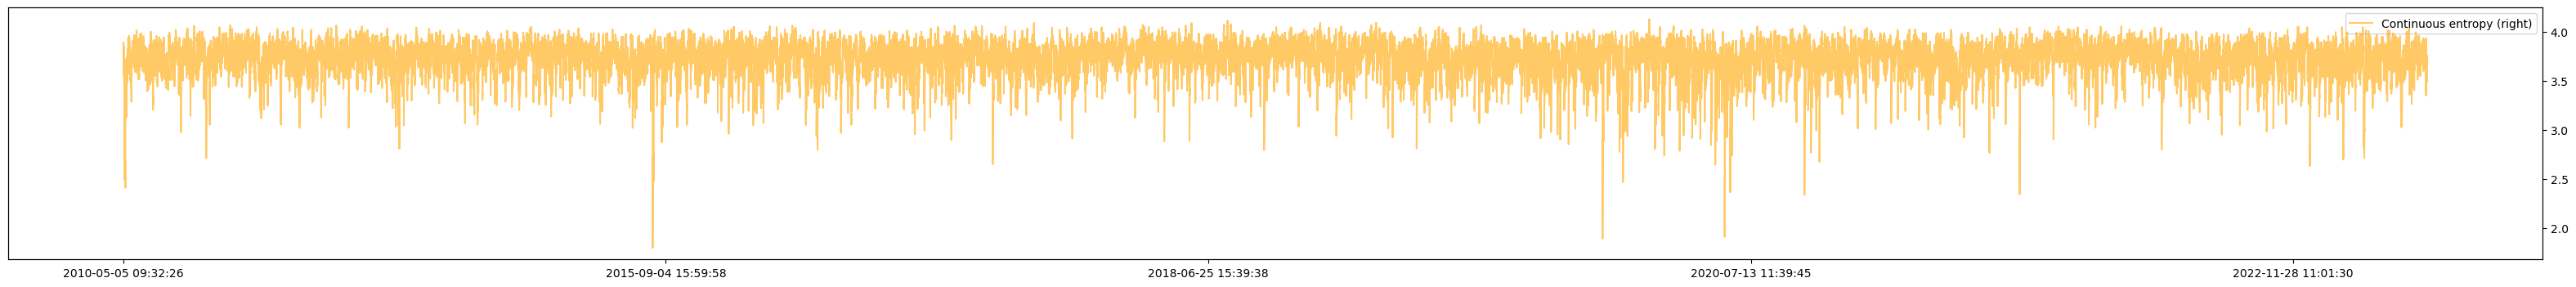

In [8]:
cont_etp.plot(color = 'orange', alpha = 0.6, secondary_y = True, figsize = (40,4))

#### discrete Entropy

In [9]:
vpin = pd.read_csv('./Data/vpin_bar.csv', index_col = 0)
vpin

,date_time,open,high,low,close,volume,buy_volume,sell_volume
0,09/28/2009 09:47:22,50.790,51.0700,50.7100,51.06,28244,21464,6780
1,09/28/2009 09:54:36,51.060,51.1500,51.0600,51.13,28575,16425,12150
2,09/28/2009 09:57:17,51.130,51.1500,51.0900,51.09,28341,22852,5489
3,09/28/2009 10:02:52,51.100,51.2600,51.0800,51.25,28654,23554,5100
4,09/28/2009 10:10:21,51.260,51.2900,51.1900,51.29,28319,16784,11535
...,...,...,...,...,...,...,...,...
82884,09/14/2023 13:11:37,162.560,162.9950,162.5500,162.98,28297,13571,14726
82885,09/14/2023 14:34:34,162.972,163.0699,162.8700,162.94,28330,11073,17257
82886,09/14/2023 15:36:28,162.930,163.2150,162.8900,162.99,58926,40704,18222
82887,09/14/2023 15:59:23,162.980,163.0600,162.9299,163.05,28291,19218,9073


In [10]:
volume_ratio = vpin['buy_volume']/vpin.volume
volume_ratio

0        0.759949
1        0.574803
2        0.806323
3        0.822014
4        0.592676
           ...   
82884    0.479591
82885    0.390858
82886    0.690765
82887    0.679297
82888    0.116671
Length: 82889, dtype: float64

In [11]:
vpin_quantile = pd.qcut(volume_ratio, q = 10, labels = range(10))

In [12]:
vpin_quantile

0        9
1        6
2        9
3        9
4        6
        ..
82884    4
82885    2
82886    8
82887    8
82888    0
Length: 82889, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [13]:
message = ''.join(map(str, vpin_quantile.values))

In [21]:
etp = []
for i in range(25, len(message)) :
    etp.append(konto_entropy(message[i-25:i]))
etp = pd.DataFrame(etp, columns = ['Konto Entropy'], index = vpin['date_time'][25:])
etp

,Konto Entropy
date_time,
09/28/2009 15:32:36,1.674916
09/28/2009 15:44:17,1.676992
09/28/2009 15:58:15,1.824893
09/29/2009 09:31:49,1.957968
09/29/2009 10:00:02,2.115524
...,...
09/14/2023 13:11:37,2.036106
09/14/2023 14:34:34,2.079128
09/14/2023 15:36:28,2.040806


In [22]:
etp.index = pd.to_datetime(etp.index)

Text(0.5, 1.0, 'Entropy with VPIN model')

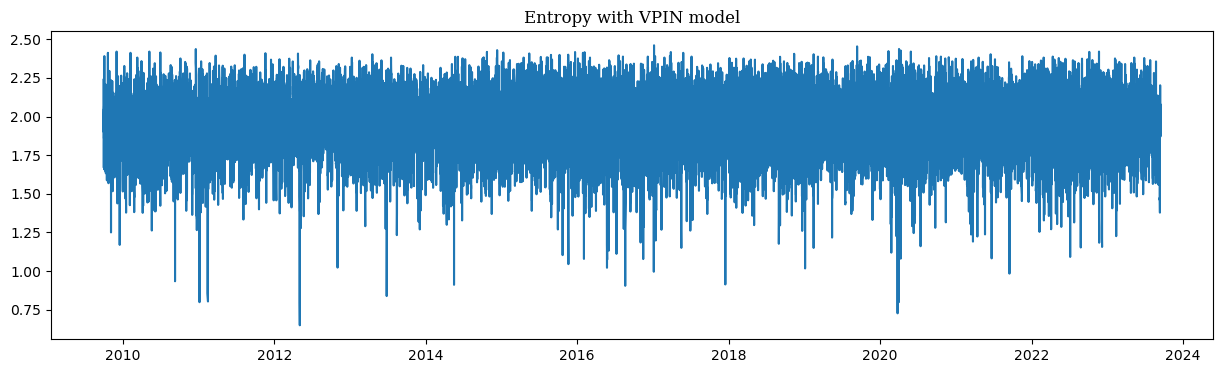

In [23]:
plt.figure(figsize = (15,4))
plt.plot(etp)
plt.title('Entropy with VPIN model', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'Entropy with VPIN model (window = 50)')

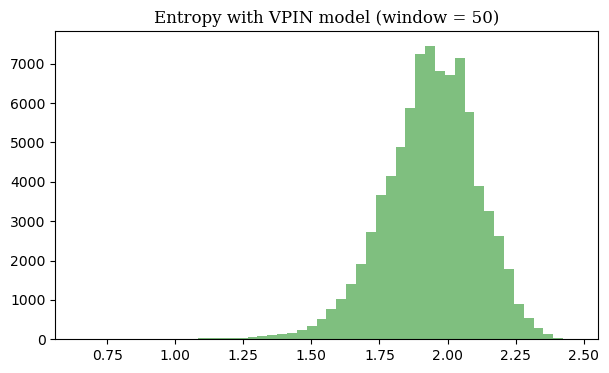

In [24]:
plt.figure(figsize = (7,4))
plt.hist(etp, bins = 50, color = 'g', alpha = 0.5)
plt.title('Entropy with VPIN model (window = 50)', fontsize = 12, fontfamily = 'Serif')

In [84]:
probs = np.ones_like(etp) / len(etp)
cdf_etp = np.cumsum(probs)

Text(0.5, 1.0, 'Entropy with VPIN model (window = 50)')

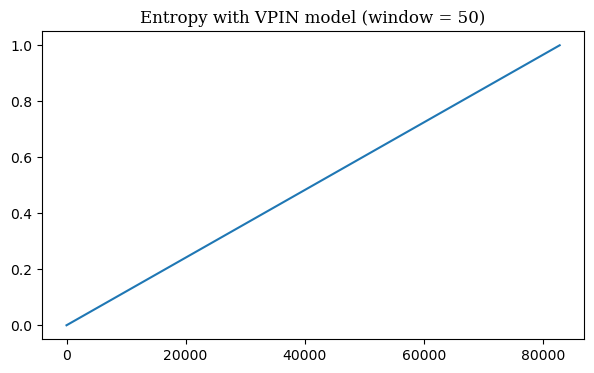

In [89]:
plt.figure(figsize = (7,4))
plt.plot(cdf_etp)
plt.title('Entropy with VPIN model (window = 50)', fontsize = 12, fontfamily = 'Serif')